# Basic Oscillator to test numerical schemes

Staring with a very simple oscillator to test the accuracy and robustness of our numerical schemes before applying them to more complex problems.

$$
\frac{dv}{dt} = - x
$$
$$
\frac{dx}{dt} = v
$$

Spring constant = 1

Energy is a conserved quantity

$$
E = x^2 + v^2
$$

In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})
from IPython.core.display import HTML
HTML( open('my_css.css').read() )

In [2]:
##Define the equations as functions for use in the program

def func_dvdt(x):       #dv/dt = -x
    return -x
def func_dxdt(v):       #dx/dt = v
    return v
def func_ddt(q):
    return np.array([q[1],-q[0]])
def func_nrgCons(x,v):    #E = x^2 + v^2
    nrgConsVal = (x**2 + v**2)
    return nrgConsVal

# Schemes:

### 1st Order : Euler Forwards

$$\phi_{n+1} = \phi_n + \Delta t f(\phi_n)$$

$\phi$ will be represented by q in the code below (q = quantity)

In [3]:
# dqdt is a list of the stored time derivatives for q, stored in order from present to the past
#ie. f(q_n) = dqdt[0] ; f(q_n-1) = dqdt[1] ;...

#phi_... = q, delta t = dt, f(...) = dqdt[...]

#q is either x or v

###Euler Forwards
def euler1(q,dt,func):
    return np.array(q + dt*func(q))

In [4]:
#Euler forwards time stepper
def onestepVar(x,v,dt,dtStep,noStep,K,M,t=0):
    tArr,xArr,vArr,conArr,dtArr = np.zeros(noStep+1),np.zeros(noStep+1),np.zeros(noStep+1),np.zeros(noStep+1),np.zeros(noStep+1)
    AccxArr,AccvArr = np.zeros(noStep+1),np.zeros(noStep+1)
    tArr[0],xArr[0],vArr[0],conArr[0],dtArr[0] = t,x,v,func_nrgCons(x,v),dt
    AccxArr[0] = x
    AccvArr[0] = v
    xvArr = np.zeros(2)
    xvArr[0] = x
    xvArr[1] = v
    stepNo = 0
    theoryErrAccArr,AccErrAccArr = np.zeros(noStep+1),np.zeros(noStep+1)
    theoryErrAccArr[0],AccErrAccArr[0] = 0,0
    
    for stepNo in range(1,noStep+1):
        xvArr = euler1(xvArr,dt,func_ddt)
        t += dt
        dtArr[stepNo] = dt
        dt = dt*dtStep
        conArr[stepNo] = func_nrgCons(xvArr[0],xvArr[1])
        xArr[stepNo] = xvArr[0]
        vArr[stepNo] = xvArr[1]
        tArr[stepNo] = t
        AccxArr[stepNo] = math.cos(t)
        AccvArr[stepNo] = -math.sin(t)
        theoryErrAccArr[stepNo] = 0.5*(M*(dtStep**2)*(dtArr[stepNo-1]**2)) + (1+ K*dtStep*dtArr[stepNo-1])*theoryErrAccArr[stepNo-1]
        stepError = math.sqrt((AccxArr[stepNo]-xArr[stepNo])**2 + (AccvArr[stepNo]-vArr[stepNo])**2)
        AccErrAccArr[stepNo] = stepError #+ AccErrAccArr[stepNo-1]
    return conArr,xArr,vArr,tArr,AccxArr,AccvArr,dtArr,AccErrAccArr,theoryErrAccArr

def onestepCon(x,v,tStop,tStep,noStep,K,M,t=0):
    tArr,xArr,vArr,conArr,dtArr = np.zeros(noStep+1),np.zeros(noStep+1),np.zeros(noStep+1),np.zeros(noStep+1),np.zeros(noStep+1)
    AccxArr,AccvArr = np.zeros(noStep+1),np.zeros(noStep+1)
    tArr[0],xArr[0],vArr[0],conArr[0],dtArr[0] = t,x,v,func_nrgCons(x,v),tStep
    AccxArr[0] = x
    AccvArr[0] = v
    xvArr = np.zeros(2)
    xvArr[0] = x
    xvArr[1] = v
    stepNo = 0
    theoryErrAccArr,AccErrAccArr = np.zeros(noStep+1),np.zeros(noStep+1)
    theoryErrAccArr[0],AccErrAccArr[0] = 0,0
    
    for stepNo in range(1,noStep+1):
        xvArr = euler1(xvArr,tStep,func_ddt)
        t += tStep    
        dtArr[stepNo] = tStep
        conArr[stepNo] = func_nrgCons(xvArr[0],xvArr[1])
        xArr[stepNo] = xvArr[0]
        vArr[stepNo] = xvArr[1]
        tArr[stepNo] = t
        AccxArr[stepNo] = math.cos(t)
        AccvArr[stepNo] = -math.sin(t)
        stepError = math.sqrt((AccxArr[stepNo]-xArr[stepNo])**2 + (AccvArr[stepNo]-vArr[stepNo])**2)
        AccErrAccArr[stepNo] = stepError #+ AccErrAccArr[stepNo-1]
        theoryErrAccArr[stepNo] = (1+K*tStep)*theoryErrAccArr[stepNo-1] + 0.5*(M*(tStep**2))
    return conArr,xArr,vArr,tArr,AccxArr,AccvArr,dtArr,AccErrAccArr,theoryErrAccArr

# Start Here for Experiments

In [30]:
#define stuff
scheme = 'var'
nsteps = 100
timestop = 2*math.pi
initialX = 1.0
initialV = 0.0
timestep = timestop/nsteps
mult = 2 #lambda^nsteps
timestepstep = mult**(1/nsteps)
initialtimestep = timestop*((timestepstep-1)/(mult-1))
maxtimestep = initialtimestep*timestepstep**(nsteps-1)

K1,K2,K3=0.1,5,10
#M1,M2,M3=0.1,5,10
#K=1
M=1

if scheme == 'var':
    print("The time step multiplier is",timestepstep)
elif scheme == 'con':
    print("The time step is",timestep)
elif scheme == 'HR':
    print("The time step for the high resolution run is",timestep)

The time step multiplier is 1.0069555500567189


In [31]:
if scheme == 'var':
    VplotC,VplotX,VplotV,VplotT3,VplotAX,VplotAV,VplotDT,VplotAE,VplotTE3 = onestepVar(initialX,initialV,initialtimestep,timestepstep,nsteps,K3,M)
elif scheme == 'con':
    CplotC,CplotX,CplotV,CplotT3,CplotAX,CplotAV,CplotDT,CplotAE,CplotTE3 = onestepCon(initialX,initialV,timestop,timestep,nsteps,K3,M)
elif scheme == 'HR':
    HplotC,HplotX,HplotV,HplotT,HplotAX,HplotAV,HplotDT,HplotAE,HplotTE = onestepCon(initialX,initialV,timestop,timestep,nsteps,K,M)
#print("No. Steps taken was",len(plotX)-1,"steps")
#print("The total time forecast was :",plotT[-1])
#print("The total number of revolutions was:",plotT[-1]/(2*math.pi))
#print("The final time step was:",plotDT[-1])

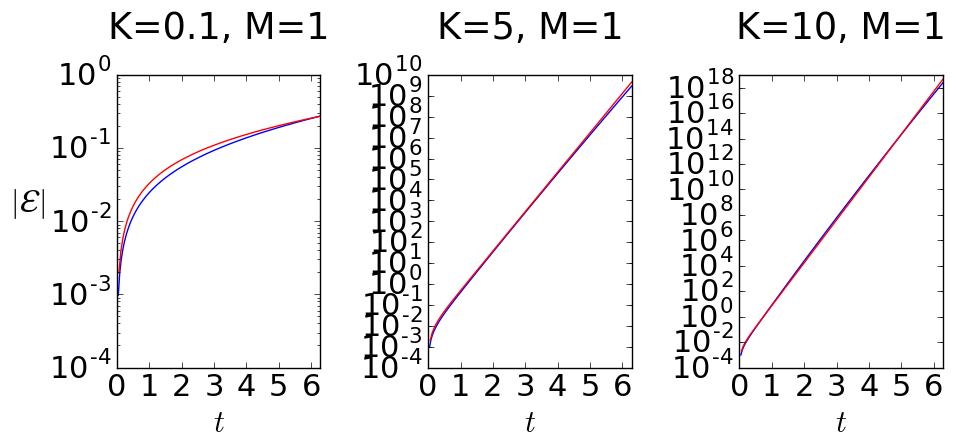

In [33]:
#figD, axesD = plt.subplots(nrows=2,ncols=1,figsize=(18,12)) 
#axesD[0].semilogy(VplotT,VplotTE,'b.-',label='Variable    $\lambda$=1.0018')
#axesD[0].semilogy(VplotT1,VplotTE1,'m.-',label='Variable    $\lambda$=1.0007')
#axesD[0].semilogy(CplotT,CplotTE,'r.-',label='Constant $\Delta t$=0.0063')
#axesD[0].set_xlim(0,timestop)
#axesD[0].set_title('Theoretical, K = 1, M = 1, nsteps = 1000')
#axesD[0].set_ylabel('Error in Radius')
#axesD[0].set_xlabel('Time')
#axesD[0].legend(loc=4)
#axesD[1].semilogy(VplotT,VplotTE,'b.-',label='Variable    $\lambda$=1.0007')
#axesD[1].semilogy(CplotT,CplotTE,'r.-',label='Constant $\Delta t$=0.0063')
#axesD[1].set_xlim(0,0.1)
#axesD[1].set_title('Theoretical, K = 1, M = 1, nsteps = 1000')
#axesD[1].set_ylabel('Error in Radius')
#axesD[1].set_xlabel('Time')
#axesD[1].legend(loc=4)
#figD.tight_layout()
#figD.savefig('ErrAccVarConComparisonPresentation_K1M1.png')


#figD, axesD = plt.subplots(nrows=1,ncols=2,figsize=(18,10)) 
#axesD[0].plot(VplotT,VplotAE,'b.-',label='Variable $\lambda$=1.0007')
#axesD[0].plot(VplotT,CplotAE,'r.-',label='Constant $\Delta t$=0.0063')
#axesD[0].set_xlim(0,timestop)
#axesD[0].set_title('Actual, nsteps = 100')
#axesD[0].legend(loc=2)
#axesD[1].semilogy(VplotT,VplotTE,'b.-',label='Variable $\lambda$=1.0007')
#axesD[1].semilogy(CplotT,CplotTE,'r.-',label='Constant $\Delta t$=0.0063')
#axesD[1].set_xlim(0,timestop)
#axesD[1].set_title('Theoretical, K = 1, M = 1, nsteps = 1000')
#axesD[1].set_ylabel('Error in Radius')
#axesD[1].set_xlabel('Time')
#axesD[1].legend(loc=2)
#figD.tight_layout()
#figD.savefig('ErrAccVarConComparison2plots_K1M1.png')

figD, axesD = plt.subplots(nrows=1,ncols=3,figsize=(10,5)) 
axesD[0].semilogy(VplotT1,VplotTE1,'b-',label='Variable')
axesD[0].semilogy(CplotT1,CplotTE1,'r-',label='Constant')
axesD[0].set_xlim(0,timestop)
axesD[0].set_title('K='+str(K1)+', M='+str(M),y=1.1)
axesD[0].set_xlabel('$t$')
axesD[0].set_ylabel('$|Ɛ|$',rotation=360,labelpad=15)
axesD[1].semilogy(VplotT2,VplotTE2,'b-',label='Variable')
axesD[1].semilogy(CplotT2,CplotTE2,'r-',label='Constant')
axesD[1].set_xlim(0,timestop)
axesD[1].set_title('K='+str(K2)+', M='+str(M),y=1.1)
axesD[1].set_xlabel('$t$')
axesD[2].semilogy(VplotT3,VplotTE3,'b-',label='Variable')
axesD[2].semilogy(CplotT3,CplotTE3,'r-',label='Constant')
axesD[2].set_xlim(0,timestop)
axesD[2].set_title('K='+str(K3)+', M='+str(M),y=1.1)
axesD[2].set_xlabel('$t$')
figD.tight_layout()
figD.savefig('FIG3p5.png')

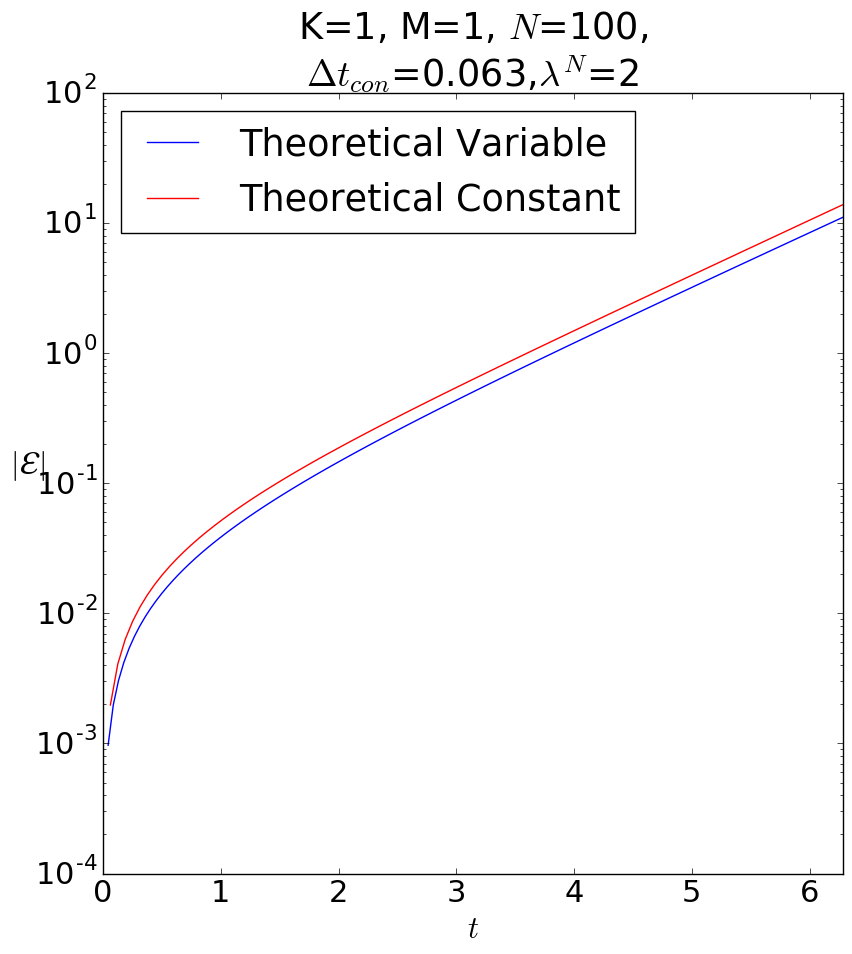

In [19]:
figD2, axesD2 = plt.subplots(nrows=1,ncols=1,figsize=(9,10)) 
axesD2.plot(VplotT,VplotTE,'b-',label='Theoretical Variable')
#axesD2.plot(VplotT,VplotAE,'m-',label='Actual Variable')
axesD2.semilogy(CplotT,CplotTE,'r-',label='Theoretical Constant')
#axesD2.plot(CplotT,CplotAE,'y-',label='Actual Constant')
axesD2.set_xlim(0,timestop)
axesD2.set_title('K='+str(K)+', M='+str(M)+', $N$='+str(nsteps)+',\n$\Delta t_{con}$='+"%.3f" %timestep+',$\lambda^N$='+str(mult))
axesD2.legend(loc=2)
#axesD2.set_xlim(6.22,timestop)
#axesD2.set_ylim(0.215,0.228)
axesD2.set_xlabel('$t$')
axesD2.set_ylabel('$|Ɛ|$',rotation=360)
figD2.tight_layout()
figD2.savefig('FIG3p4.png')

NameError: name 'HplotT' is not defined

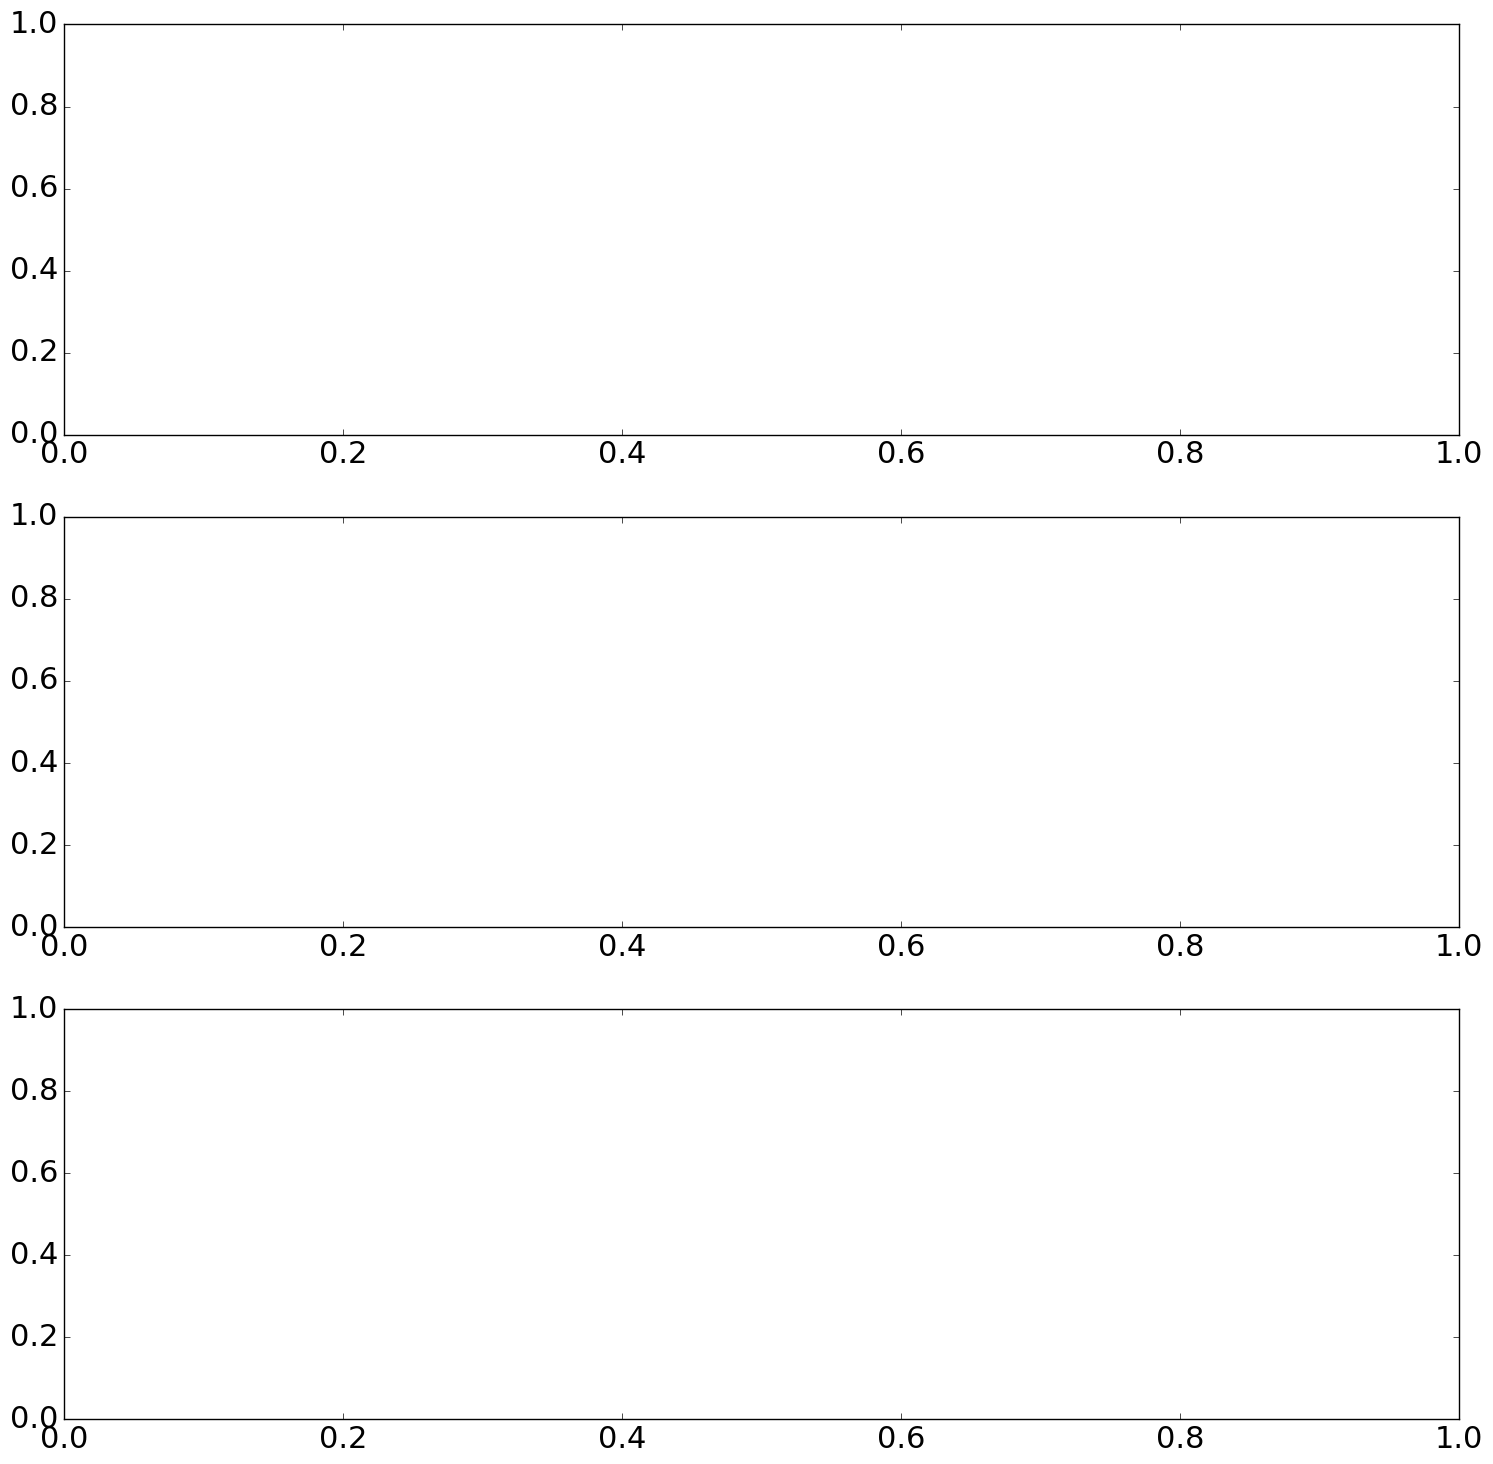

In [58]:
Verror = [math.sqrt((a-c)**2 + (b-d)**2) for a,b,c,d in zip(VplotX,VplotV,VplotAX,VplotAV)]
Cerror = [math.sqrt((e-g)**2 + (f-h)**2) for e,f,g,h in zip(CplotX,CplotV,CplotAX,CplotAV)]
#print (len(error), len(plotT))    
figE, axesE = plt.subplots(nrows=3,ncols=1,figsize=(18,18)) 
axesE[0].plot(HplotT,HplotAX,'k.-',label='HR')
axesE[0].plot(CplotT,CplotX,'b.-',label='Con')
axesE[0].plot(VplotT,VplotX,'r.-',label='Var')
axesE[0].set_title('Value of X (Steps Taken = '+str(nsteps)+', Initial Time Step = '+str(initialtimestep)+')')
axesE[0].set_xlim(0,timestop)
axesE[0].legend(loc=3)
axesE[1].plot(HplotT,HplotAV,'k.-',label='HR')
axesE[1].plot(CplotT,CplotV,'b.-',label='Con')
axesE[1].plot(VplotT,VplotV,'r.-',label='Var')
axesE[1].set_title('Value of V (Steps Taken = '+str(nsteps)+', Initial Time Step = '+str(initialtimestep)+')')
axesE[1].set_xlim(0,timestop)
axesE[1].legend(loc=2)
axesE[2].plot(CplotT,Cerror,'b.-',label='Con')
axesE[2].plot(VplotT,Verror,'r.-',label='Var')
axesE[2].set_title('Error in Position (Steps Taken = '+str(nsteps)+', Initial Time Step = '+str(initialtimestep)+')')
axesE[2].grid()
axesE[2].set_xlim(0,timestop)
axesE[2].legend(loc=2)
figE.tight_layout()
figE.savefig('Comparing Variable and Constant - EF - '+str(nsteps)+' - '+str(initialtimestep)+' - V1.png')

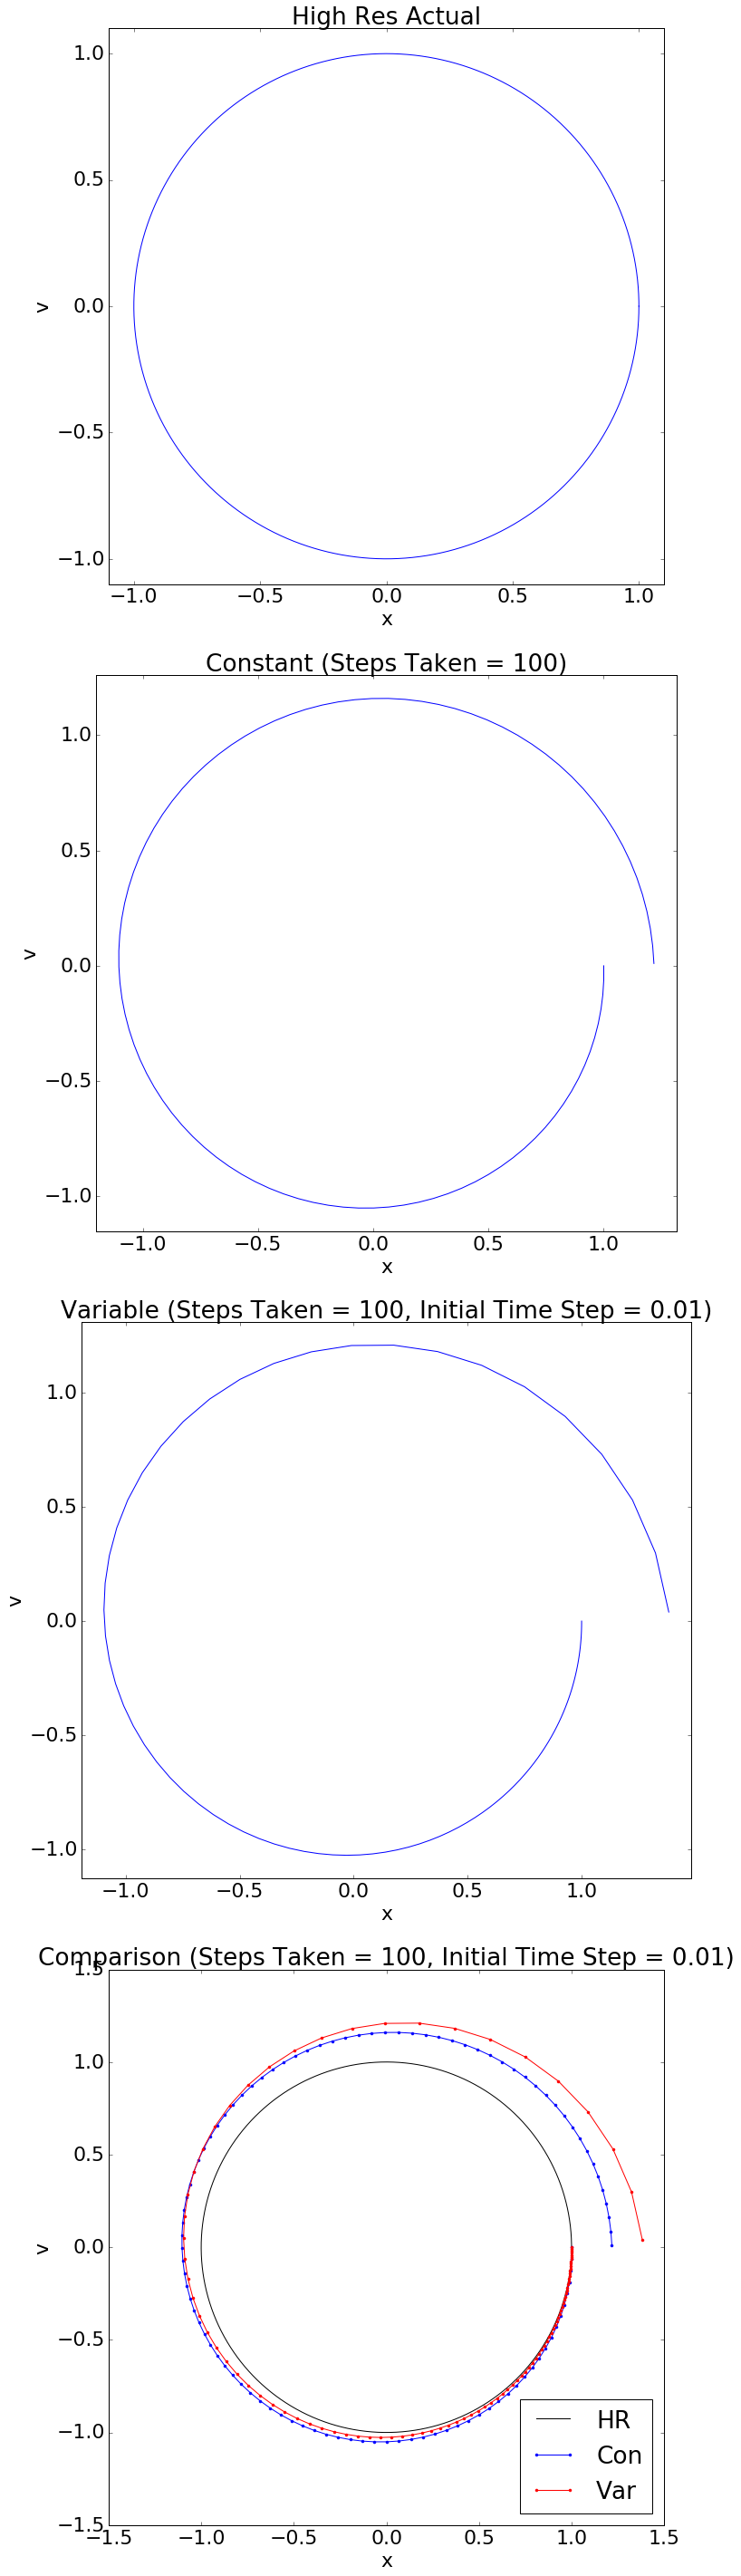

In [175]:
figF, axesF = plt.subplots(nrows=4,ncols=1,figsize=(18,40))
axesF[0].plot(HplotAX,HplotAV)
axesF[0].set(adjustable='box-forced', aspect='equal')
axesF[0].set_xlabel('x')
axesF[0].set_ylabel('v')
axesF[0].set_title('High Res Actual')
axesF[0].set_xlim(min(HplotAX)-0.1,max(HplotAX)+0.1)
axesF[0].set_ylim(min(HplotAV)-0.1,max(HplotAV)+0.1)
axesF[1].plot(CplotX,CplotV)
axesF[1].set(adjustable='box-forced', aspect='equal')
axesF[1].set_xlabel('x')
axesF[1].set_ylabel('v')
axesF[1].set_title('Constant (Steps Taken = '+str(nsteps)+')')
axesF[1].set_xlim(min(CplotX)-0.1,max(CplotX)+0.1)
axesF[1].set_ylim(min(CplotV)-0.1,max(CplotV)+0.1)
axesF[2].plot(VplotX,VplotV)
axesF[2].set(adjustable='box-forced', aspect='equal')
axesF[2].set_xlabel('x')
axesF[2].set_ylabel('v')
axesF[2].set_title('Variable (Steps Taken = '+str(nsteps)+', Initial Time Step = '+str(initialtimestep)+')')
axesF[2].set_xlim(min(VplotX)-0.1,max(VplotX)+0.1)
axesF[2].set_ylim(min(VplotV)-0.1,max(VplotV)+0.1)
axesF[3].plot(HplotAX,HplotAV,'k-',label='HR')
axesF[3].plot(CplotX,CplotV,'b.-',label='Con')
axesF[3].plot(VplotX,VplotV,'r.-',label='Var')
axesF[3].set(adjustable='box-forced', aspect='equal')
axesF[3].set_xlabel('x')
axesF[3].set_ylabel('v')
axesF[3].set_title('Comparison (Steps Taken = '+str(nsteps)+', Initial Time Step = '+str(initialtimestep)+')')
axesF[3].legend(loc=4)
figF.tight_layout()
figF.savefig('Comparing Variable and Constant - EF - '+str(nsteps)+' - '+str(initialtimestep)+' - V2.png')